<a href="https://colab.research.google.com/github/abdulaneef002/FUTURE_DS-01/blob/main/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Load CSV file (adjust the path if needed)
df = pd.read_csv("/content/student_feedback.csv")

# Show first few rows
print(df.head())

# Show column names
print(df.columns)

# Shape of the dataset
print(df.shape)


   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7                     6   
3                                           6                     7   
4                                          10                     8   

   Degree of difficulty of assignments  Solves doubts willingly  \
0                                    6                        9   
1                                    6                        2   
2                

In [13]:
# Rename long column names for ease of use
df.columns = [
    "Index", "Student ID", "Well Versed", "Explains Clearly", "Presentations",
    "Assignment Difficulty", "Doubt Solving", "Course Structure",
    "Student Support", "Recommendation"
]

# Drop the Index column
df.drop(columns=["Index"], inplace=True)


In [14]:
# Basic stats on ratings
print(df.describe())


        Student ID  Well Versed  Explains Clearly  Presentations  \
count  1001.000000  1001.000000       1001.000000    1001.000000   
mean    500.000000     7.497502          6.081918       5.942058   
std     289.108111     1.692998          2.597168       1.415853   
min       0.000000     5.000000          2.000000       4.000000   
25%     250.000000     6.000000          4.000000       5.000000   
50%     500.000000     8.000000          6.000000       6.000000   
75%     750.000000     9.000000          8.000000       7.000000   
max    1000.000000    10.000000         10.000000       8.000000   

       Assignment Difficulty  Doubt Solving  Course Structure  \
count            1001.000000    1001.000000       1001.000000   
mean                5.430569       5.474525          5.636364   
std                 2.869046       2.874648          2.920212   
min                 1.000000       1.000000          1.000000   
25%                 3.000000       3.000000          3.000000 

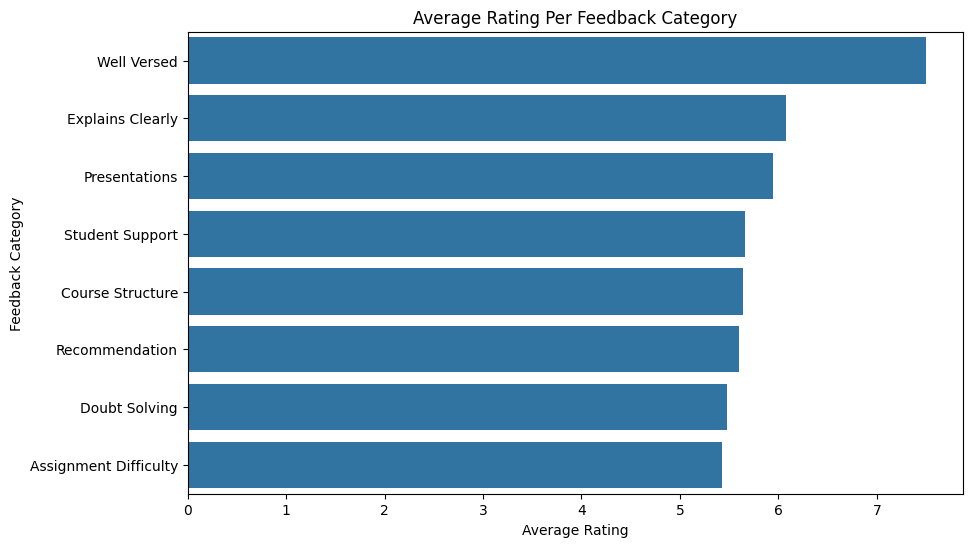

In [15]:
rating_cols = [
    "Well Versed", "Explains Clearly", "Presentations",
    "Assignment Difficulty", "Doubt Solving", "Course Structure",
    "Student Support", "Recommendation"
]

# Calculate mean rating per question
avg_ratings = df[rating_cols].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index)
plt.title("Average Rating Per Feedback Category")
plt.xlabel("Average Rating")
plt.ylabel("Feedback Category")
plt.show()


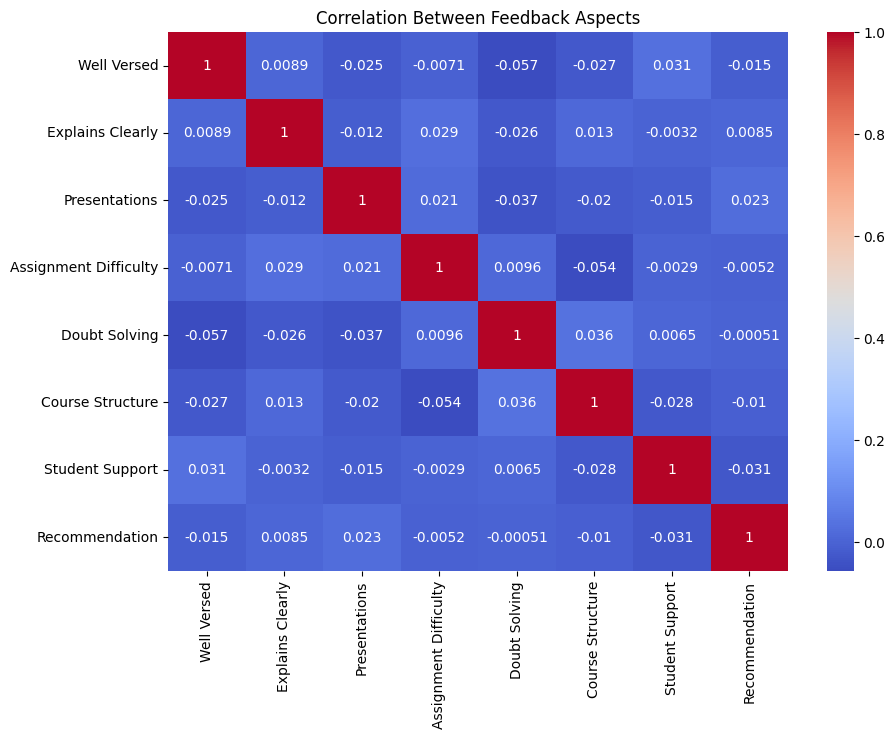

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Feedback Aspects")
plt.show()


In [17]:
# Top students who gave highest total ratings
df["Total Score"] = df[rating_cols].sum(axis=1)

top_5 = df.sort_values(by="Total Score", ascending=False).head()
print("Top 5 Most Positive Feedbacks:")
print(top_5[["Student ID", "Total Score"] + rating_cols])


Top 5 Most Positive Feedbacks:
     Student ID  Total Score  Well Versed  Explains Clearly  Presentations  \
199         770           66           10                10              5   
110         188           66            7                 6              8   
692         238           66            8                 7              5   
580          78           65           10                 9              6   
658         269           65            9                10              6   

     Assignment Difficulty  Doubt Solving  Course Structure  Student Support  \
199                      7             10                 7                7   
110                      9              9                 8                9   
692                     10             10                 9                7   
580                      8             10                 7                7   
658                     10             10                 1                9   

     Recommendation

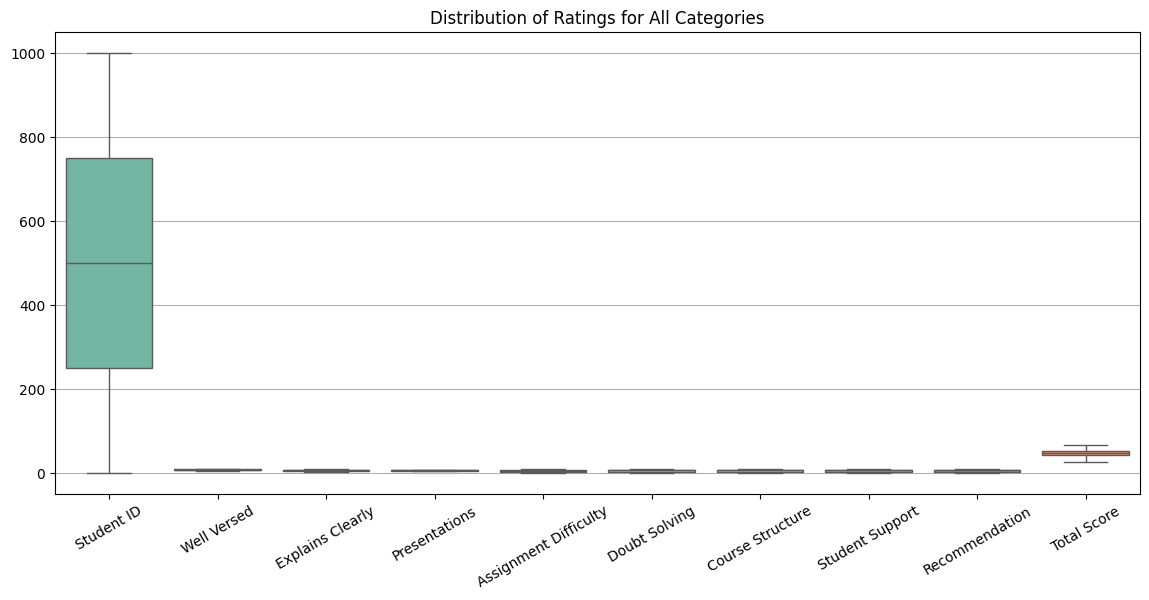

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, palette="Set2")
plt.title("Distribution of Ratings for All Categories")
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


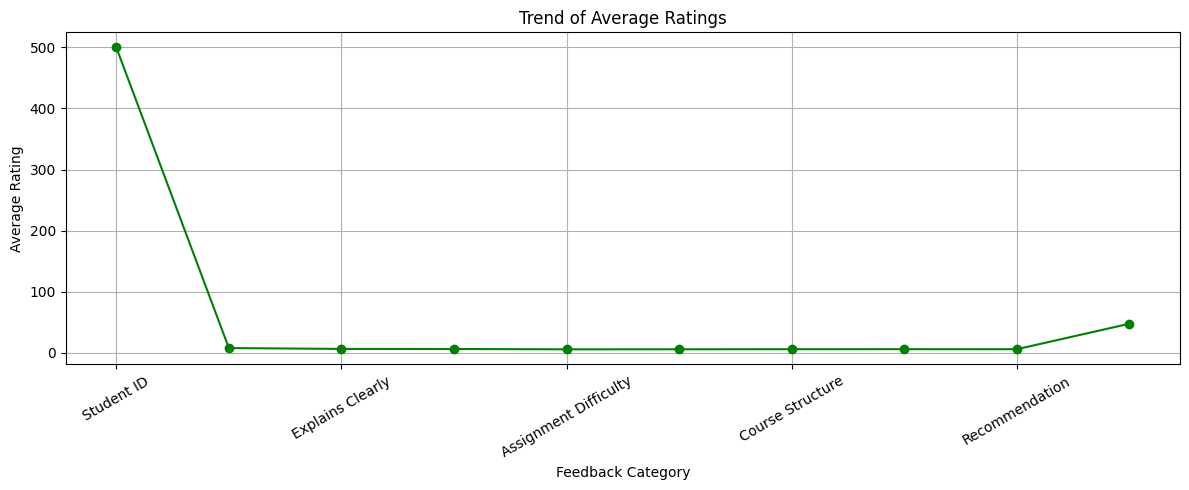

In [19]:

plt.figure(figsize=(12,5))
df.mean().plot(marker='o', color='green')
plt.title("Trend of Average Ratings")
plt.xlabel("Feedback Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()



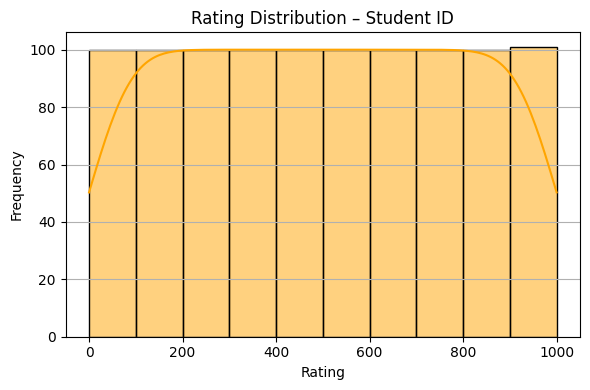

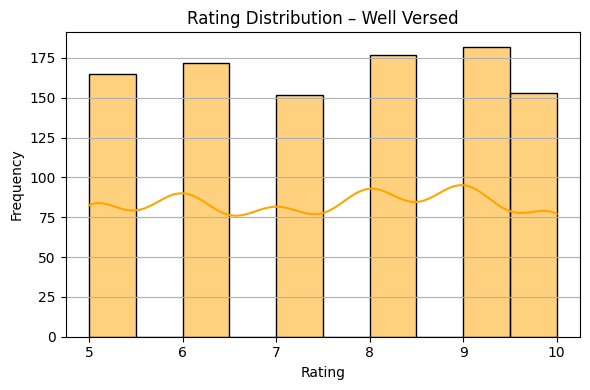

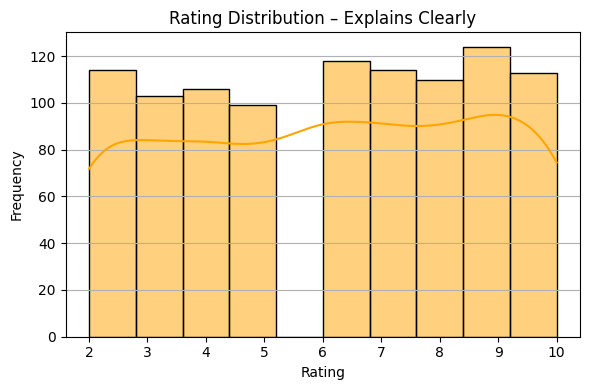

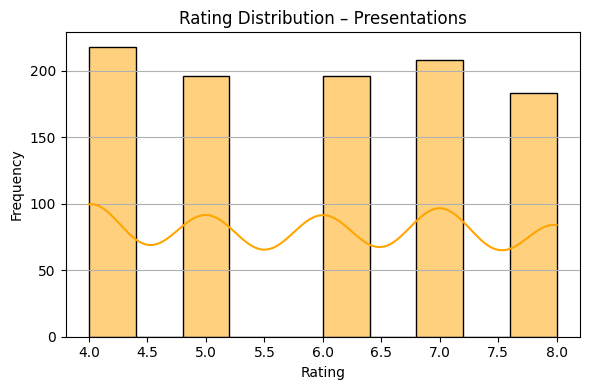

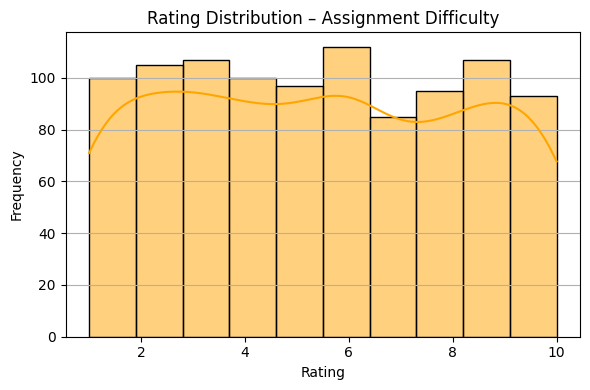

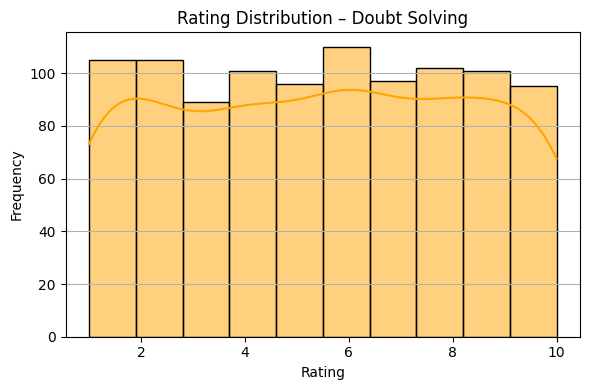

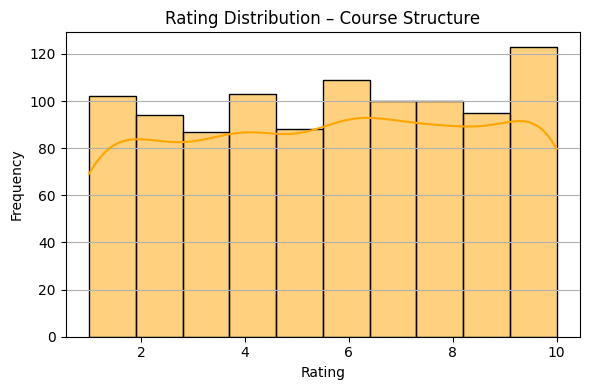

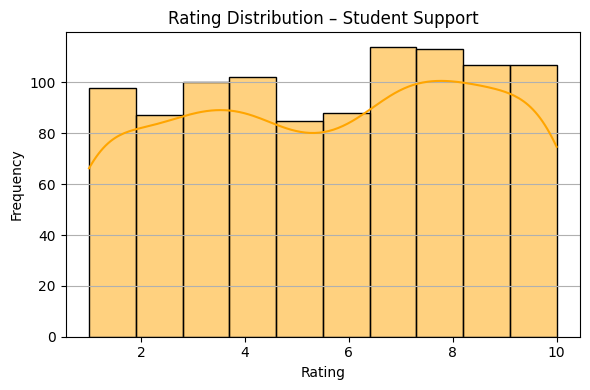

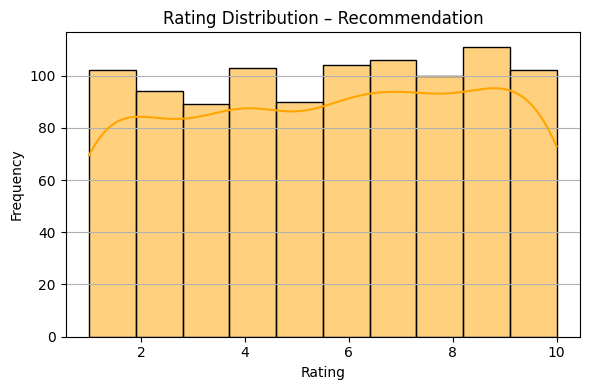

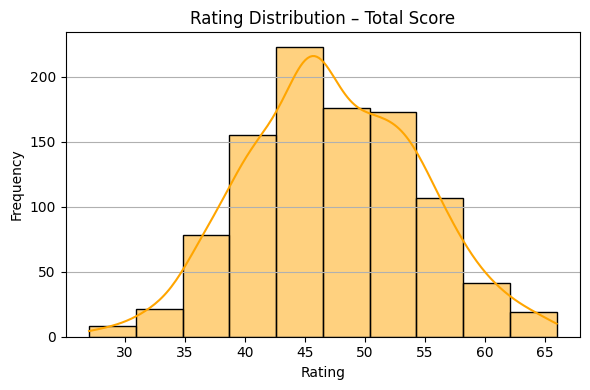

In [20]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=10, kde=True, color='orange')
    plt.title(f"Rating Distribution – {col}")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
